## Dimensionality Reduction
---
**Elo notes**

In machine learning and statistics, dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration, via obtaining a set of principal variables. It can be divided into feature selection and feature extraction .

#### Dimension reduction

For high-dimensional datasets (i.e. with number of dimensions more than 10), dimension reduction is usually performed prior to applying a K-nearest neighbors algorithm (k-NN) in order to avoid the effects of the curse of dimensionality.

Feature extraction and dimension reduction can be combined in one step using principal component analysis (PCA), linear discriminant analysis (LDA), or canonical correlation analysis (CCA) techniques as a pre-processing step followed by clustering by K-NN on feature vectors in reduced-dimension space. In machine learning this process is also called low-dimensional embedding.

For very-high-dimensional datasets (e.g. when performing similarity search on live video streams, DNA data or high-dimensional Time series) running a fast approximate K-NN search using locality sensitive hashing, random projection,"sketches" or other high-dimensional similarity search techniques from the VLDB toolbox might be the only feasible option.

#### Advantages of dimensionality reduction


- It reduces the time and storage space required.
- Removal of multi-collinearity improves the performance of the machine learning model.
- It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D.

#### Applications

A dimensionality reduction technique that is sometimes used in neuroscience is maximally informative dimensions, which finds a lower-dimensional representation of a dataset such that as much information as possible about the original data is preserved.

#### Feature selection

Feature selection approaches try to find a subset of the original variables (also called features or attributes). 

There are three strategies; 

- filter (e.g. information gain) -
- wrapper (e.g. search guided by accuracy) approaches 
- embedded (features are selected to add or be removed while building the model based on the prediction errors). 

See also combinatorial optimization problems.

In some cases, data analysis such as regression or classification can be done in the reduced space more accurately than in the original space.

#### Feature extraction

Feature extraction transforms the data in the high-dimensional space to a space of fewer dimensions. 

The data transformation may be linear, as in principal component analysis (PCA).

But many nonlinear dimensionality reduction techniques also exist. For multidimensional data, tensor representation can be used in dimensionality reduction through multilinear subspace learning.

#### Principal component analysis (PCA)

The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. 

In practice, the covariance (and sometimes the correlation) matrix of the data is constructed and the eigen vectors on this matrix are computed.

The eigen vectors that correspond to the largest eigenvalues (the principal components) can now be used to reconstruct a large fraction of the variance of the original data. 

Moreover, the first few eigen vectors can often be interpreted in terms of the large-scale physical behavior of the system. 

The original space (with dimension of the number of points) has been reduced (with data loss, but hopefully retaining the most important variance) to the space spanned by a few eigenvectors.

#### Kernel PCA

Principal component analysis can be employed in a nonlinear way by means of the kernel trick. The resulting technique is capable of constructing nonlinear mappings that maximize the variance in the data. The resulting technique is entitled kernel PCA.



#### Dimensionality reduction

The transformation $T = X W$ maps a data vector $x(i)$ from an original space of p variables to a new space of $p$ variables which are uncorrelated over the dataset. However, not all the principal components need to be kept. Keeping only the first L principal components, produced by using only the first L loading vectors, gives the truncated transformation

${\displaystyle \mathbf {T} _{L}=\mathbf {X} \mathbf {W} _{L}}$

where the matrix TL now has n rows but only $L$ columns. In other words, PCA learns a linear transformation ${\displaystyle t=W^{T}x,x\in R^{p}}$, where the columns of $p × L$ matrix $W$ form an orthogonal basis for the L features (the components of representation t) that are decorrelated. By construction, of all the transformed data matrices with only $L$ columns, this score matrix maximises the variance in the original data that has been preserved, while minimising the total squared reconstruction error

$ {\displaystyle \|\mathbf {T} \mathbf {W} ^{T}-\mathbf {T} _{L}\mathbf {W} _{L}^{T}\|_{2}^{2}} $ or $∥ X − X L ∥ 2 2 {\displaystyle \|\mathbf {X} -\mathbf {X} _{L}\|_{2}^{2}} $

A principal components analysis scatterplot of Y-STR haplotypes calculated from repeat-count values for 37 Y-chromosomal STR markers from 354 individuals.
PCA has successfully found linear combinations of the different markers, that separate out different clusters corresponding to different lines of individuals' Y-chromosomal genetic descent.

Such dimensionality reduction can be a very useful step for visualising and processing high-dimensional datasets, while still retaining as much of the variance in the dataset as possible. For example, selecting $L = 2$ and keeping only the first two principal components finds the two-dimensional plane through the high-dimensional dataset in which the data is most spread out, so if the data contains clusters these too may be most spread out, and therefore most visible to be plotted out in a two-dimensional diagram; whereas if two directions through the data (or two of the original variables) are chosen at random, the clusters may be much less spread apart from each other, and may in fact be much more likely to substantially overlay each other, making them indistinguishable.

Similarly, in regression analysis, the larger the number of explanatory variables allowed, the greater is the chance of overfitting the model, producing conclusions that fail to generalise to other datasets. One approach, especially when there are strong correlations between different possible explanatory variables, is to reduce them to a few principal components and then run the regression against them, a method called principal component regression.

Dimensionality reduction may also be appropriate when the variables in a dataset are noisy. If each column of the dataset contains independent identically distributed Gaussian noise, then the columns of T will also contain similarly identically distributed Gaussian noise (such a distribution is invariant under the effects of the matrix W, which can be thought of as a high-dimensional rotation of the co-ordinate axes). However, with more of the total variance concentrated in the first few principal components compared to the same noise variance, the proportionate effect of the noise is less—the first few components achieve a higher signal-to-noise ratio. PCA thus can have the effect of concentrating much of the signal into the first few principal components, which can usefully be captured by dimensionality reduction; while the later principal components may be dominated by noise, and so disposed of without great loss.


In [20]:
from sklearn.datasets import load_digits

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, decomposition, ensemble
from sklearn import lda, manifold, random_projection, preprocessing


from statsmodels.regression import linear_model

import statsmodels.api as sm
import seaborn as sea
sea.set()

import pandas as pd
import numpy as np

digits = load_digits()

% pylab inline
% autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
#digits = datasets.load_digits(n_class=6)

In [193]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [73]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [74]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

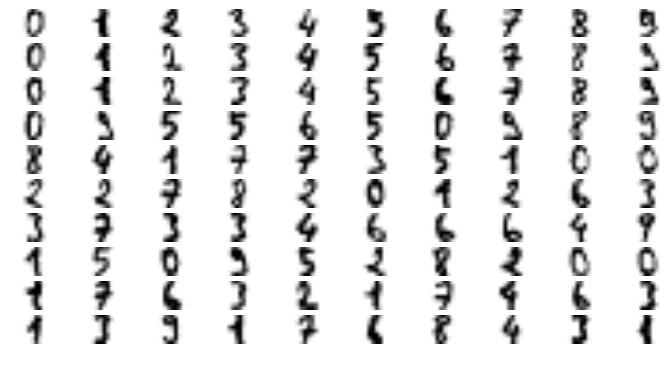

In [75]:
fig, axes = plt.subplots(10, 10, figsize=(12, 6))

for i, ax in enumerate(axes.ravel()):
    ax.axis('off')
    ax.imshow(digits.images[i])


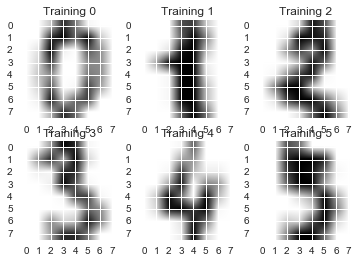

In [228]:
fig, axes = plt.subplots(2, 3)

for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i])
    ax.set_title('Training {}'.format(str(i)))

#### Standard Scaler

In [77]:
data = digits.data
target_number = digits.target

sscaler = StandardScaler()
scaled_data = sscaler.fit_transform(data)


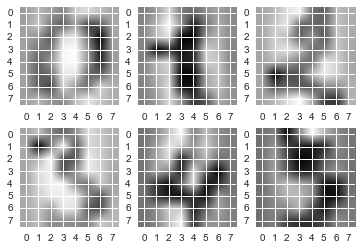

In [78]:
fig, axes = plt.subplots(2, 3)
for i, ax in enumerate(axes.ravel()):
    sdata = scaled_data[i].reshape(8, -1)
    ax.imshow(sdata)

#### Preprocessing

In [4]:
X_centered = preprocessing.scale(digits.data)

In [6]:
ss = preprocessing.StandardScaler()

In [7]:
ss.fit_transform(digits.data)

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ..., 
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

#### PCA

Projecting data into lower dimensional space  to 10 components.

In [8]:
len(X_centered)

1797

In [9]:
pca = decomposition.PCA(n_components=10)

In [10]:
Xpca = pca.fit_transform(X_centered)

In [17]:
def pareto(pca):
    values = pca.explained_variance_ratio_
    
    plt.figure(figsize=(10, 6), dpi=250)
    cumulative_variance = np.cumsum(values)
    
    ax = plt.subplot(111)
    
    ax.plot(range(len(values)+1), np.insert(cumulative_variance, 0, 0), color='r', marker='o')
    ax.bar(range(len(values)), values, alpha=0.8)
    
    ax.axhline(0.9, color='g', linestyle='--')
    ax.set_xlabel('Principal Component', fontsize=12)
    ax.set_ylabel('Variance Explained (%)', fontsize=12)
    
    plt.title('Pareto plot', fontsize=16)

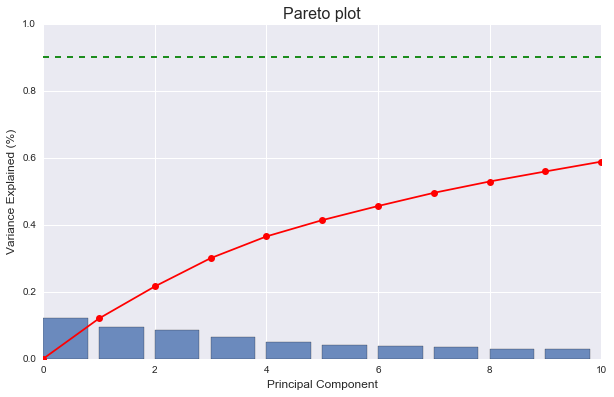

In [18]:
pareto(pca)

In [288]:
pca = PCA(n_components=10)
principal = pca.fit_transform(scaled_data)

In [220]:
pca.n_components_

10

In [221]:
pca.explained_variance_ratio_

array([ 0.12033916,  0.09561054,  0.08444415,  0.06498405,  0.04860142,
        0.04214026,  0.03941496,  0.03388488,  0.02996761,  0.02931792])

/Users/eloisaelias/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/eloisaelias/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/eloisaelias/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it cont

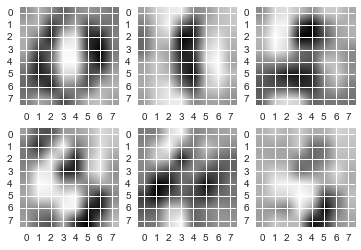

In [246]:
fig, axes = plt.subplots(2, 3)
for i, ax in enumerate(axes.ravel()):
    pca_data = pca.transform(scaled_data[i])
    principal_data = pca_data.dot(pca.components_).reshape(8, -1)
    ax.imshow(principal_data);

#### Explained Variance

Due to loss of information, one way we can deter,ome how well our PCA is providing the correct amount of information per component. The fewer principle components that explain the most variance. 

Obtaining the optimal number of components to keep in order to represent the dataset

In [297]:
def evariance_pca(pca):
    components = pca.n_components_
    xaxis = np.arange(components)
    evariance = pca.explained_variance_ratio_
    
    plt.figure(figsize=(12, 6))
    ax = plt.subplot(111)
    ax.bar(xaxis, evariance, 0.4, 
           color=['red', 'green', 'blue', 'cyan', 'magenta'], alpha=0.5)
    
    for i in xrange(components):
        ax.annotate('{:1.4}%'.format((str(evariance[i]*100))),
                   (xaxis[i], evariance[i]), 
                    fontsize=12)
    
#     ax.set_xticklabels(xaxis, fontsize=12)
    
    ax.set_ylim(0, max(evariance)+0.02)
    ax.set_xlim(0-0.45, 8+0.45)
    
    ax.set_xlabel('Principal Component')
    ax.set_ylabel('Explained Variance (%)')
    ax.set_title('PCA Pareto')

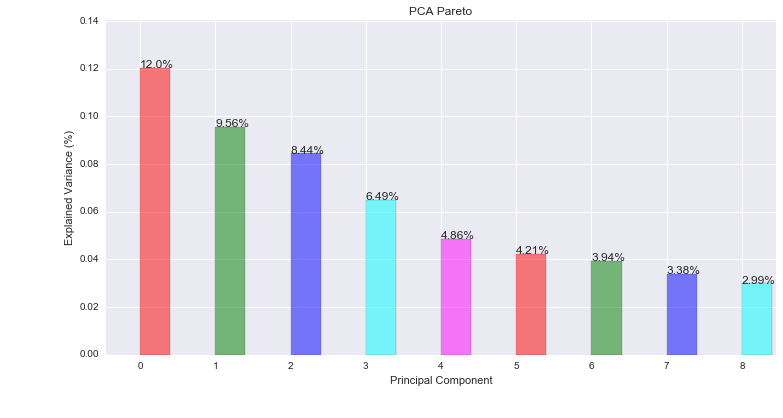

In [298]:
evariance_pca(pca)

#### Embedding

Projection into a 2-dimensional space in order to visualize the dataset into a 2-dimensional plane.

In [225]:
def embedding(X, y):
    xmin, xmax = np.min(X, 0), np.max(X, 0)
    X = (X - xmin) / (xmax-xmin)
    
    plt.figure(figsize=(12, 6))
    ax = plt.subplot(111)
    ax.axis('off')
    
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.))
    plt.xticks([])
    plt.yticks([])
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])


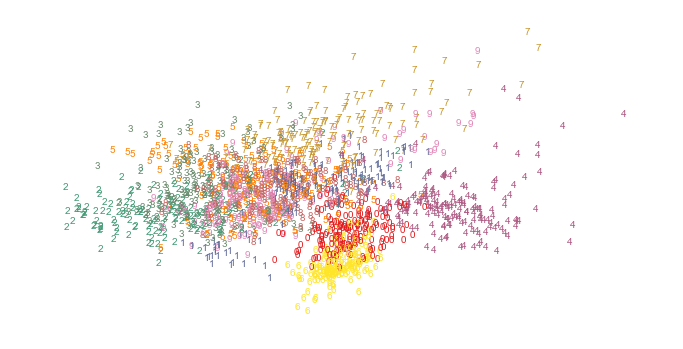

In [226]:
embedding(principal, target_number)

In [256]:
names = ['mpg', 'cylinders','displacement','horsepower',
        'weight','acceleration','model_year', 'origin', 'description']

In [305]:
df = pd.read_table('data/cars.tsv', 
                   header=None, 
                   names=names,
                   delim_whitespace=True,
                   na_values='?').dropna(how='any')

In [306]:
df[:2]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,description
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
description     392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [308]:
df.origin = df.origin.astype('category')
df = df.drop('description', axis=1)

In [309]:
target = df.pop('mpg').values
features = pd.get_dummies(df).values

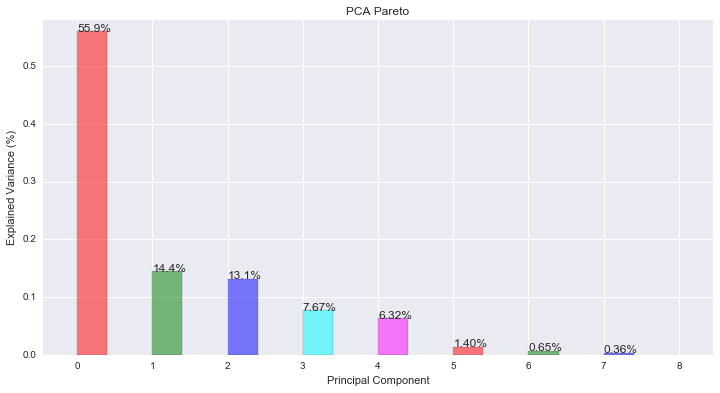

In [322]:
scaler = StandardScaler()
feature_scaling = scaler.fit_transform(features)

pca_ = PCA(8)
principal_features = pca_.fit_transform(feature_scaling, target)
evariance_pca(pca_)

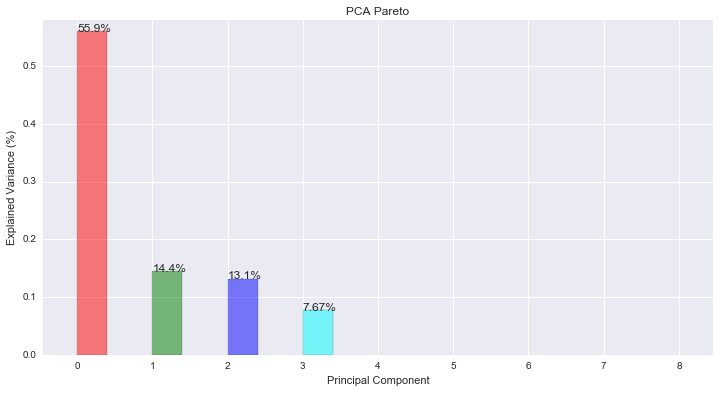

In [324]:
pca__ = PCA(4)
principal_features_ = pca__.fit_transform(feature_scaling, target)
evariance_pca(pca__)

In [330]:
model = sm.OLS(target, sm.add_constant(principal_features_))
results = model.fit()

print results.rsquared
print results.rsquared_adj
results.summary()

0.774241618809
0.771908198849


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     331.8
Date:                Sun, 29 Jan 2017   Prob (F-statistic):          1.28e-123
Time:                        18:51:29   Log-Likelihood:                -1069.5
No. Observations:                 392   AIC:                             2149.
Df Residuals:                     387   BIC:                             2169.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         23.4459      0.188    124.532      0.000        23.076    23.816
x1            -2.9243      0.084    -34.868      0.000        -3.089    -2.759
x2            -1.1287      0.165     -6.837      0.000        -1.453    -0.804
x3            -0.4256      0.173     -2.458      0.014        -0.766    -0.085
x4            -1.7341      0.226     -7.657      0.000        -2.179    -1.289
==============================================================================
Omnibus:                       18.183   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.179
Skew:                           0.409   Prob(JB):                     9.26e-06
Kurtosis:                       3.865   Cond. No.                         2.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [331]:
model = sm.OLS(target, features)
results = model.fit()

print results.rsquared
print results.rsquared_adj
results.summary()

0.824199469912
0.820527396176


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sun, 29 Jan 2017   Prob (F-statistic):          1.79e-139
Time:                        18:52:24   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.4897      0.321     -1.524      0.128        -1.121     0.142
x2             0.0240      0.008      3.133      0.002         0.009     0.039
x3            -0.0182      0.014     -1.326      0.185        -0.045     0.009
x4            -0.0067      0.001    -10.243      0.000        -0.008    -0.005
x5             0.0791      0.098      0.805      0.421        -0.114     0.272
x6             0.7770      0.052     15.005      0.000         0.675     0.879
x7           -17.9546      4.677     -3.839      0.000       -27.150    -8.759
x8           -15.3246      4.602     -3.330      0.001       -24.374    -6.276
x9           -15.1014      4.681     -3.226      0.001       -24.305    -5.898
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     1.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. 

The number of principal components is less than or equal to the number of original variables.

This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. 

The resulting vectors are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

Hotelling is known to statisticians because of Hotelling's T-squared distribution which is a generalization of the Student's t-distribution in multivariate setting, and its use in statistical hypothesis testing and confidence regions. He also introduced canonical correlation analysis.

in signal processing, the Hotelling transform in multivariate quality control, proper orthogonal decomposition (POD) in mechanical engineering, singular value decomposition (SVD) of X (Golub and Van Loan, 1983), eigenvalue decomposition (EVD) of $X^T X$ in linear algebra, factor analysis

PCA is mostly used as a tool in exploratory data analysis and for making predictive models.

PCA can be done by eigenvalue decomposition of a data covariance (or correlation) matrix or singular value decomposition of a data matrix, usually after mean centering (and normalizing or using Z-scores) the data matrix for each attribute.

The results of a PCA are usually discussed in terms of component scores, sometimes called factor scores (the transformed variable values corresponding to a particular data point), and loadings (the weight by which each standardized original variable should be multiplied to get the component score).

**PCA is the simplest of the true eigenvector-based multivariate analyses.**

Often, its operation can be thought of as revealing the internal structure of the data in a way that best explains the variance in the data. 

If a multivariate dataset is visualised as a set of coordinates in a high-dimensional data space (1 axis per variable), PCA can supply the user with a lower-dimensional picture, a projection or "shadow" of this object when viewed from its (in some sense; see below) most informative viewpoint. This is done by using only the first few principal components so that the dimensionality of the transformed data is reduced.

PCA is closely related to factor analysis. 

Factor analysis typically incorporates more domain specific assumptions about the underlying structure and solves eigenvectors of a slightly different matrix.

PCA is also related to canonical correlation analysis (CCA). 

CCA defines coordinate systems that optimally describe the cross-covariance between two datasets while PCA defines a new orthogonal coordinate system that optimally describes variance in a single dataset.

#### Intuition

PCA can be thought of as fitting an n-dimensional ellipsoid to the data, where each axis of the ellipsoid represents a principal component. If some axis of the ellipsoid is small, then the variance along that axis is also small, and by omitting that axis and its corresponding principal component from our representation of the dataset, we lose only a commensurately small amount of information.

To find the axes of the ellipsoid, we must first subtract the mean of each variable from the dataset to center the data around the origin. Then, we compute the covariance matrix of the data, and calculate the eigenvalues and corresponding eigenvectors of this covariance matrix. Then, we must orthogonalize the set of eigenvectors, and normalize each to become unit vectors. Once this is done, each of the mutually orthogonal, unit eigenvectors can be interpreted as an axis of the ellipsoid fitted to the data. The proportion of the variance that each eigenvector represents can be calculated by dividing the eigenvalue corresponding to that eigenvector by the sum of all eigenvalues.

It is important to note that this procedure is sensitive to the scaling of the data, and that there is no consensus as to how to best scale the data to obtain optimal results.


#### PCA is mathematically defined

as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

Consider a data matrix, $X$, with column-wise zero empirical mean (the sample mean of each column has been shifted to zero), where each of the n rows represents a different repetition of the experiment, and each of the p columns gives a particular kind of feature (say, the results from a particular sensor).

Mathematically, the transformation is defined by a set of p-dimensional vectors of weights or loadings 

${\displaystyle \mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}}$ 

that map each row vector ${\displaystyle \mathbf {x} _{(i)}}$ of $X$ to a new vector of principal component scores